In [133]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import collections
import seaborn as sns


In [134]:
import matplotlib as mpl
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['b', 'm', 'y', 'k']) 

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}

mpl.rc('font', **font)

In [135]:
df_loans = pd.read_csv('data_files/kiva_loans.csv')
df_loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [136]:
df_loans.shape

(671205, 20)

Number of loans is 671,205. 

In [137]:
df_mpi = pd.read_csv('data_files/kiva_mpi_region_locations.csv')
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


## Loan Counts by Sector, Country, Region

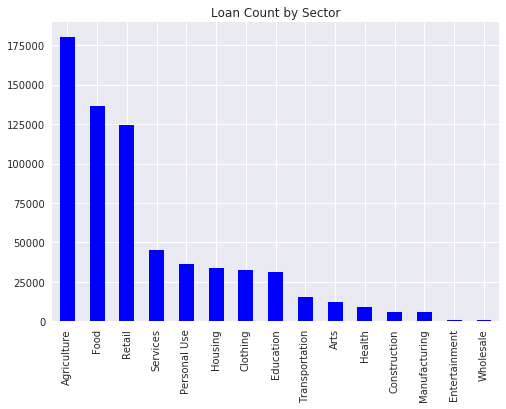

In [138]:
df_loans['sector'].value_counts().plot.bar(title="Loan Count by Sector")
plt.show()

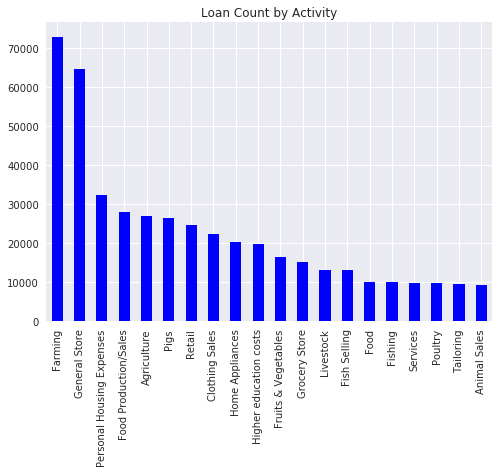

In [139]:
df_loans['activity'].value_counts().head(20).plot.bar(title="Loan Count by Activity")
plt.show()

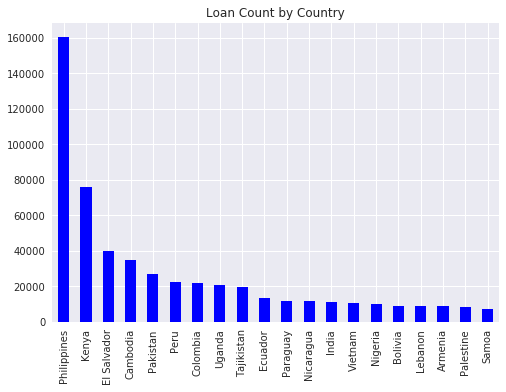

In [140]:
df_loans['country'].value_counts().head(20).plot.bar(title="Loan Count by Country")
plt.show()

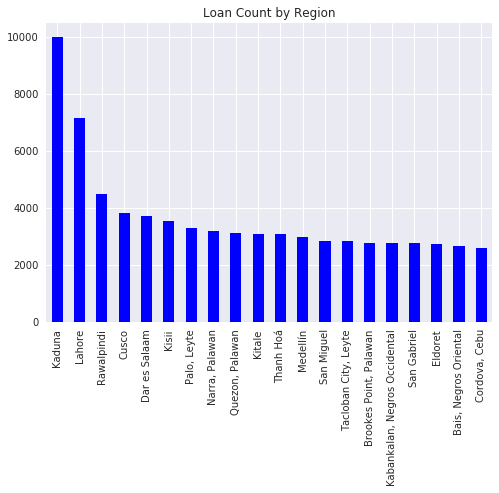

In [141]:
df_loans['region'].value_counts().head(20).plot.bar(title="Loan Count by Region")
plt.show()

## Sector trends within individual countries

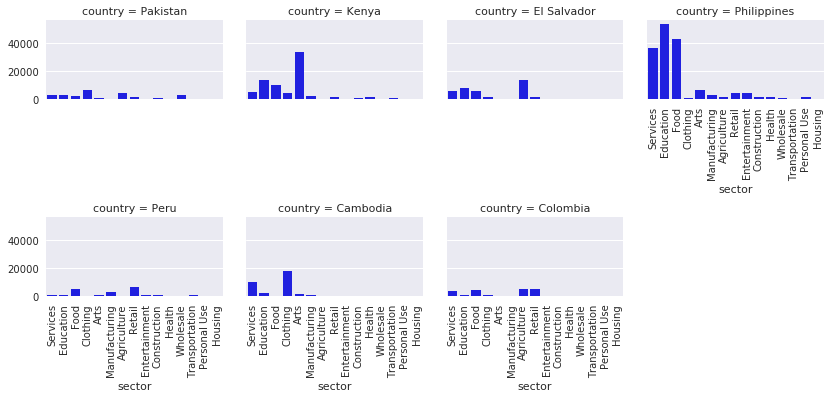

In [142]:
df = df_loans[df_loans['country'].isin(['Philippines', 'Kenya', 'El Salvador', 'Cambodia', 'Pakistan', 'Peru', 'Colombia'])]
g = sns.FacetGrid(df, col="country", col_wrap=4)
g.set_xticklabels(rotation=90)
g.map(sns.countplot, 'sector')
plt.show()

## Borrower Demographics

Here, we have to parse the strings that state the borrower genders within each group (i.e. 'female, female, female, male').

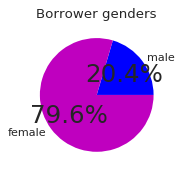

In [143]:
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import figure

genders = np.array(df_loans['borrower_genders'])

genders_updated = []

for gender in genders:
    if(type(gender)==str):
        gender = gender.replace(',', '').replace("'", '').replace("[", '').replace("]", '').split(' ')
        for x in gender:
            genders_updated.append(x)

borrower_genders = collections.Counter(genders_updated)

figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
the_grid = GridSpec(3, 1)

plt.subplot(the_grid[2, 0], aspect=1)
plt.pie(list(borrower_genders.values()), labels=borrower_genders.keys(), autopct='%1.1f%%',)
plt.title('Borrower genders')


plt.show()

## Loan term length and loan amount

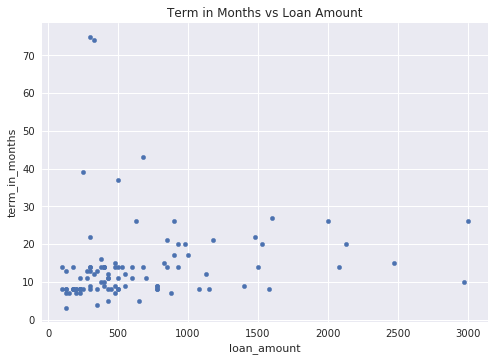

In [144]:
df_loans[df_loans['loan_amount'] < 4000].sample(100).plot.scatter(x='loan_amount', y='term_in_months', title='Term in Months vs Loan Amount')
plt.show()

Doesn't seem like there's a correlation - not sure what term in months means. 

## Loan Amount Trends

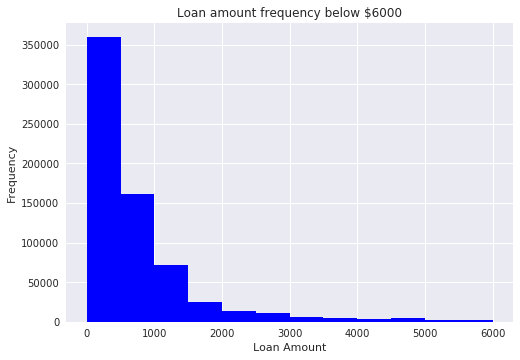

In [145]:
ax = df_loans['loan_amount'].plot.hist(bins=12, range=(1,6000), title="Loan amount frequency below $6000")
ax.set_xlabel("Loan Amount")
plt.show()

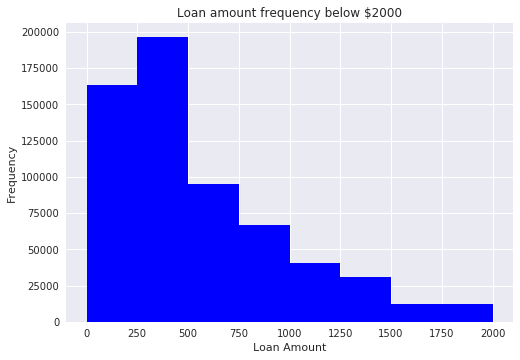

In [146]:
ax = df_loans['loan_amount'].plot.hist(bins=8, range=(1,2000), title="Loan amount frequency below $2000")
ax.set_xlabel("Loan Amount")
plt.show()

In [147]:
max_loan = df_loans["loan_amount"].max()
print("Max loan: " + str(max_loan))

Max loan: 100000.0


## Let's see if there is a relationship between loans and Multinational Poverty Index (MPI)

This is the loan MPI region locations table. We have regions and their corresponding MPI.

In [148]:
df_mpi.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [149]:
df_loans[df_loans["region"] == "Lahore"].head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01


In [150]:
df_mpi[df_mpi["region"] == "Lahore"]

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon


Note that not all of the loan regions are included in the MPI table! E.g. second most common region for loans is Lahore, and it isn't in the MPI dataset (shown above). However, Lahore is a city in the Pakistani province of Punjab, which is in the dataset. 

In [151]:
df_mpi[df_mpi["region"] == "Punjab"]

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
733,"Punjab, Pakistan",PAK,Pakistan,Punjab,South Asia,0.184,"(31.1704063, 72.7097161)",31.170406,72.709716


In [152]:
df_mpi[df_mpi["region"] == "Eastern"].head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
288,"Eastern, Ghana",GHA,Ghana,Eastern,Sub-Saharan Africa,0.155,"(31.2652893, 32.3018661)",31.265289,32.301866
452,"Eastern, Kenya",KEN,Kenya,Eastern,Sub-Saharan Africa,0.190,"(0.7137256, 35.517938)",0.713726,35.517938
584,"Eastern, Mongolia",MNG,Mongolia,Eastern,East Asia and the Pacific,0.044,"(47.4658154, 115.392712)",47.465815,115.392712
928,"Eastern, Trinidad and Tobago",TTO,Trinidad and Tobago,Eastern,Latin America and Caribbean,0.026,"(11.2979348, -60.55885240000001)",11.297935,-60.558852
934,"Eastern, Tanzania, United Republic of",TZA,"Tanzania, United Republic of",Eastern,Sub-Saharan Africa,0.145,"(-6.369028, 34.888822)",-6.369028,34.888822


Also, there are a lot of regions with the same name! 8 named "Eastern", each in a different country. So we need a solution for matching the region from the MPI table with the region from the Loans table when they're not always the same. 

In [153]:
df_loans.shape

(671205, 20)

Now let's join the loans table with the MPI region locations table, so that we can see the MPI of each loan.

In [154]:
df_mpi.shape

(2772, 9)

We have a new table with information about world cities and their province. If we can match these with cities in the loans table, then we can update the loan's region to be the correct province. 

In [155]:
df_cities = pd.read_csv('data_files/simplemaps-worldcities-basic.csv')
df_cities.head()

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan


We need to merge the loans table with the cities table so that if the region in loans is listed as a city, then we replace it with that city's region. 

In [156]:
df4 = df_cities[['city', 'country', 'province']]
df_cl = pd.merge(df_loans, df4, how='left', left_on=['region', 'country'], right_on = ['city', 'country'])
df_cl[df_cl['region'] == 'Lahore'].head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,...,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,city,province
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01,Lahore,Punjab
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01,Lahore,Punjab
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01,Lahore,Punjab
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01,Lahore,Punjab
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,...,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01,Lahore,Punjab


We will merge the loans table and the MPI table on region and country. Hopefully no country has regions with the same name!

In [157]:
df3 = df_mpi[['region', 'country', 'MPI']]
df3 = df3[np.isfinite(df3['MPI'])]
df_lm = pd.merge(df_cl, df3,  how='left', left_on=['region','country'], right_on = ['region','country'])
df_lm = pd.merge(df_cl, df3,  how='left', left_on=['province','country'], right_on = ['region','country'])
df_lm.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region_x,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,city,province,region_y,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,12.0,12,NaN,female,irregular,2014-01-01,Lahore,Punjab,Punjab,0.184
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,11.0,14,NaN,"female, female",irregular,2014-01-01,Lahore,Punjab,Punjab,0.184
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,...,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01,NaN,NaN,NaN,NaN
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,11.0,8,NaN,female,irregular,2014-01-01,Lahore,Punjab,Punjab,0.184
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,...,14.0,16,NaN,female,monthly,2014-01-01,NaN,NaN,NaN,NaN


In [158]:
df_lm.shape

(671205, 24)

In [159]:
df_lm[df_lm["region_x"] == "Lahore"].head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region_x,currency,...,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date,city,province,region_y,MPI
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,...,12.0,12,NaN,female,irregular,2014-01-01,Lahore,Punjab,Punjab,0.184
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,...,11.0,14,NaN,"female, female",irregular,2014-01-01,Lahore,Punjab,Punjab,0.184
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,...,11.0,8,NaN,female,irregular,2014-01-01,Lahore,Punjab,Punjab,0.184
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,...,14.0,19,user_favorite,female,monthly,2014-01-01,Lahore,Punjab,Punjab,0.184
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,...,11.0,24,NaN,female,irregular,2014-01-01,Lahore,Punjab,Punjab,0.184


In [160]:
df_nullMPI = df_lm[df_lm['MPI'].isnull()]

In [161]:
df_nullMPI.shape

(591923, 24)

We still have 591,923 loans with null MPI!! This means that most loans don't match with a region in the MPI table :( 

## Loan Count by MPI

Note - right now this is not accurate at all because most loans don't have an associated MPI

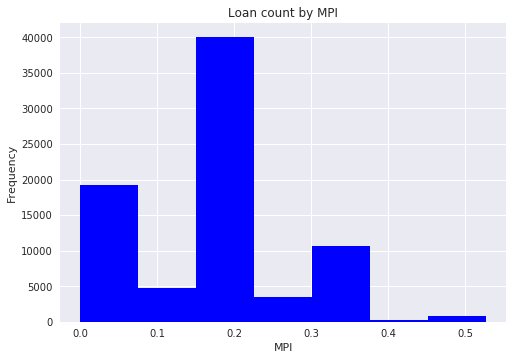

In [162]:
ax1 = df_lm['MPI'].plot.hist(bins=7,title="Loan count by MPI")
ax1.set_xlabel("MPI")
plt.show()

Most loans are where the MPI is below 0.2.

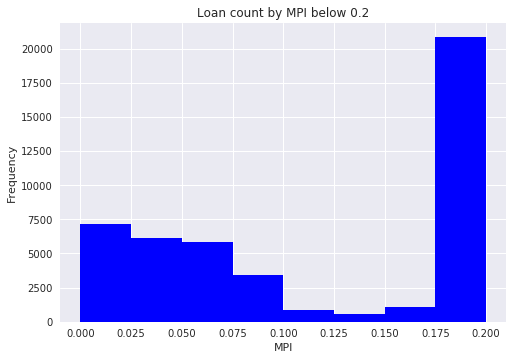

In [163]:
ax2 = df_lm['MPI'].plot.hist(bins=8, range=(0.0,0.2),title="Loan count by MPI below 0.2")
ax2.set_xlabel("MPI")
plt.show()

Most just below 0.2, but not much of a pattern. 

Ideas:
* Trends within different countries  - amount funded 
* Show total number of sectors, number of countries
* Check if most are in rural or urban areas 
* Change bar graph y axis to percentages (!!)
* Sector and amount funded
* Find database with names of regions and towns

Questions:
* What is the difference between funded amount and loan amount?
* Is there data on the lenders?

Predicting:
* Learn from patterns in countries (i.e. relationship between number of women in country & poverty index), then apply to individual loans